In [25]:
# This Notebook will serve solely for data esploration 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('housing.csv')

df = pd.read_csv("housing.csv")

In [27]:
data.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [ ]:
#Checking for null values
data.info()

#Dropping said Null values
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
# Defining the 2 data sets 
# then fusing the 2 training set separately from the test samples

from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)



train_data= X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

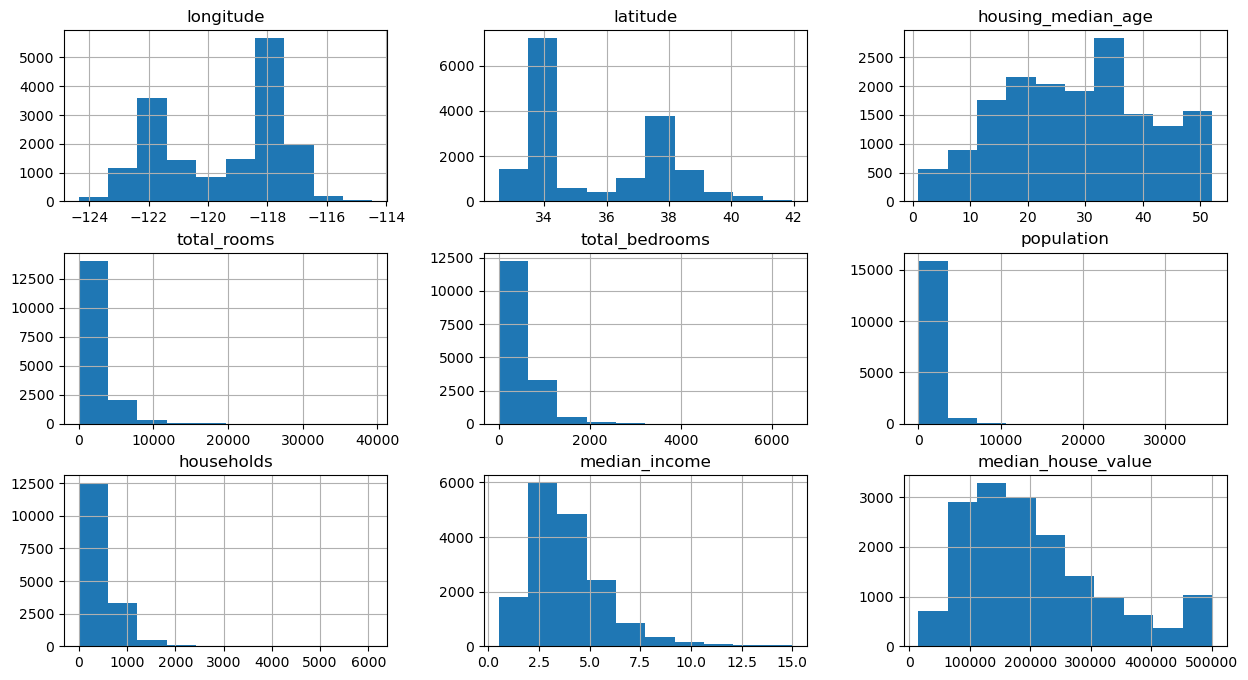

In [30]:
train_data.hist(figsize=(15,8))

In [31]:
# After checking for the distribution of our data we want to havea look to any possible correlation

# Checking for any significant correlation avoiding the any non numerical data piece

train_data.select_dtypes(include=['number']).corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924518,-0.104057,0.045334,0.069345,0.098184,0.055282,-0.011745,-0.041064
latitude,-0.924518,1.000000,0.007326,-0.037302,-0.067261,-0.108492,-0.071772,-0.083967,-0.148383
housing_median_age,-0.104057,0.007326,1.000000,-0.359968,-0.318452,-0.291158,-0.301400,-0.120176,0.101702
total_rooms,0.045334,-0.037302,-0.359968,1.000000,0.930541,0.856722,0.918272,0.198533,0.132223
total_bedrooms,0.069345,-0.067261,-0.318452,0.930541,1.000000,0.876163,0.979742,-0.007141,0.048442
population,0.098184,-0.108492,-0.291158,0.856722,0.876163,1.000000,0.905911,0.006181,-0.025605
households,0.055282,-0.071772,-0.301400,0.918272,0.979742,0.905911,1.000000,0.013854,0.064500
median_income,-0.011745,-0.083967,-0.120176,0.198533,-0.007141,0.006181,0.013854,1.000000,0.684936
median_house_value,-0.041064,-0.148383,0.101702,0.132223,0.048442,-0.025605,0.064500,0.684936,1.000000


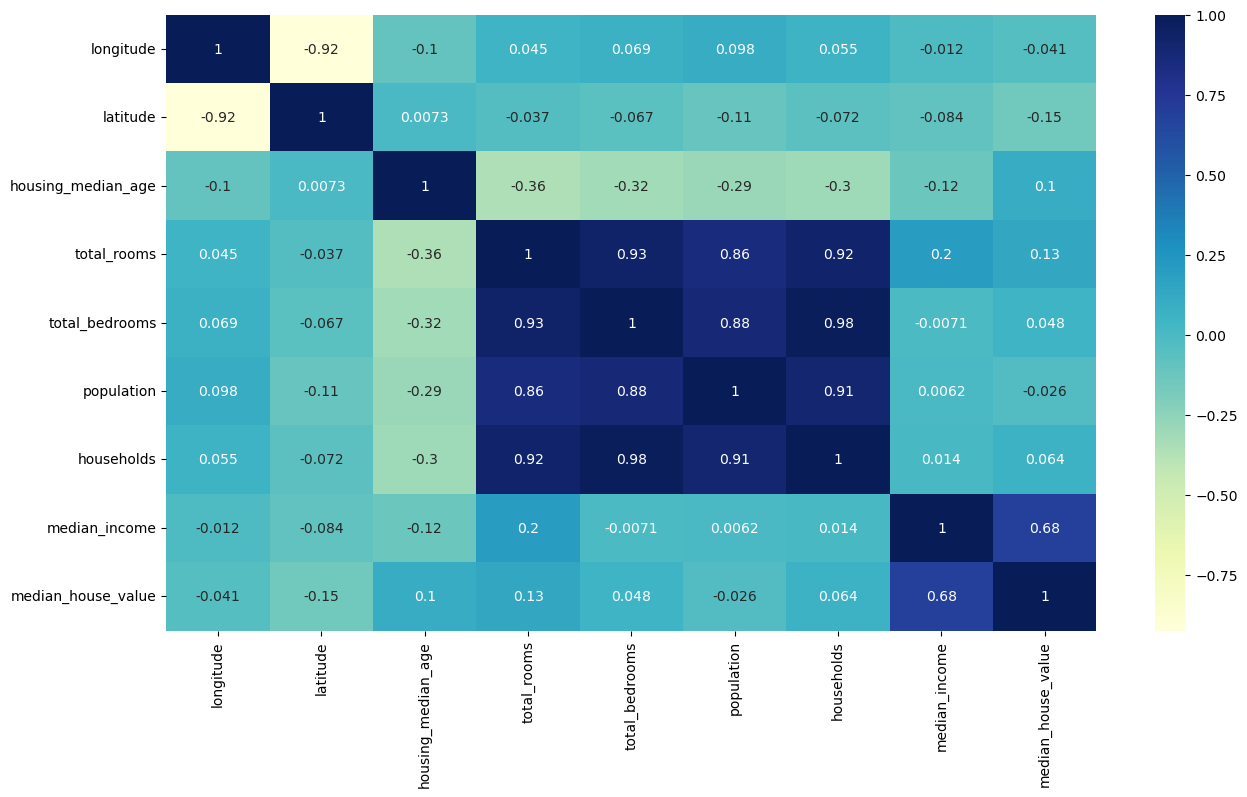

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
numeric_corr = train_data.select_dtypes(include=['number']).corr()  # numeric-only
sns.heatmap(numeric_corr, annot=True, cmap="YlGnBu")               # use numeric_corr here
plt.show()

# The original attempt to calculate correlation failed because train_data contains
# non-numeric columns (like strings), which pandas can't convert to floats for correlation.
# So, we first select only the numeric columns with select_dtypes(include=['number']),
# then calculate correlation on that subset. This avoids the error and lets us
# plot the heatmap correctly using only numeric data.


In [ ]:
#Finding possible strong correlation, Data is pointing at median income as a strong predictor for Median house value